In [1]:
import numpy as np

In [2]:
import random

In [4]:
users = range(1000)
products = range(10000)
purchaces = []
for i in range(100000):
    u = random.choice(users)
    p = random.choice(products)
    purchaces.append((u,p))
    

In [5]:
type(purchaces)

list

In [6]:
purchaces[:5]

[(825, 2198), (810, 3556), (82, 4721), (311, 6665), (496, 7754)]

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(purchaces,columns = ['user','product'])

In [9]:
df.head()

,user,product
0,825,2198
1,810,3556
2,82,4721
3,311,6665
4,496,7754


In [10]:
df1 = df['product']

In [23]:
df1.head()

0    2198
1    3556
2    4721
3    6665
4    7754
Name: product, dtype: int64

In [24]:
type(df1)

pandas.core.series.Series

In [25]:
df1 = pd.DataFrame(df1)

In [27]:
df1.shape

(100000, 1)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
minmaxsc = MinMaxScaler()

In [28]:
df2 = minmaxsc.fit_transform(df1)

In [29]:
type(df2)

numpy.ndarray

In [30]:
df2.shape

(100000, 1)

In [31]:
from sklearn.cluster import KMeans

In [33]:
clust = KMeans(n_clusters = 8)
clust = clust.fit(df2)

In [35]:
clust.labels_

array([0, 7, 2, ..., 6, 5, 1])

In [36]:
df.head()

,user,product
0,825,2198
1,810,3556
2,82,4721
3,311,6665
4,496,7754


In [37]:
df['clust_id'] = clust.labels_

In [38]:
df.head()

,user,product,clust_id
0,825,2198,0
1,810,3556,7
2,82,4721,2
3,311,6665,1
4,496,7754,6


In [39]:
clust.inertia_

129.35483290419157

In [40]:
totWithinSS = []
for i in range(2,15):
    clust = KMeans(n_clusters = i)
    clust = clust.fit(df2)
    totWithinSS.append(clust.inertia_)

In [41]:
import matplotlib.pyplot as plt

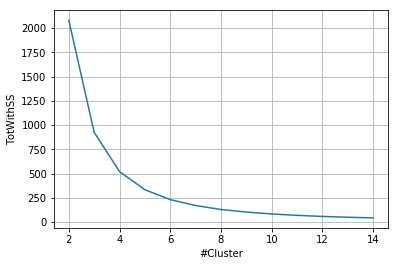

In [42]:
plt.plot(range(2,15),totWithinSS)
plt.xlabel('#Cluster')
plt.ylabel('TotWithSS')
plt.grid()
plt.show()

In [43]:
clust = KMeans(n_clusters = 10)
clust = clust.fit(df2)

In [44]:
clust.inertia_

83.27509095669487

In [45]:
df.head()

,user,product,clust_id
0,825,2198,0
1,810,3556,7
2,82,4721,2
3,311,6665,1
4,496,7754,6
